<a href="https://colab.research.google.com/github/bcrompvoets/Star_Formation/blob/main/SF_Classify_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Class I, II, and others using Support Vectors Classification

Using data from the four IRAC bands (3.6, 4.5, 5.8, and 8  μm), we classify each object as "other", Class I or Class II protostars. We use GridSearch and SVC to find the best parameters. 

This data comes from Cornu and Montillaud (2021) (https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/647/A116) and includes Spitzer data of the Orion and NGC 2264 star forming regions.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 

In [2]:
# Loading input and target features from files, normalize

X = np.load("Input_Class_3Classes_Sep.npy") # Load input data
Y = np.load("Target_Class_3Classes_Sep.npy") # Load target data

inp_tr, inp_va, tar_tr, tar_va = train_test_split(X, Y, test_size=0.25 )

print ('Training set == ',np.shape(inp_tr),np.shape(tar_tr),', Validation set == ', np.shape(inp_va),np.shape(tar_va))

# scaler_S= StandardScaler().fit(inp_tr)  # find parameters of fitting model based on training set

# inp_tr= scaler_S.transform(inp_tr) # Normalized training set

# inp_va= scaler_S.transform(inp_va)  # Normalized validation set (using normalization from training set)

Training set ==  (20177, 8) (20177, 1) , Validation set ==  (6726, 8) (6726, 1)


Testing a number of parameter spaces varying the type of kernel, the value of gamma, and the value of C.

In [3]:
# Specify the pipeline
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

# Specify parameter space to test
# param_grid = [{'svc__kernel':['rbf','sigmoid','linear','poly'], 'svc__gamma':['auto','scale'], 'svc__C':np.arange(0.1,1.,0.1)}]
param_grid = [{'svc__kernel':['rbf',], 'svc__gamma':['auto'], 'svc__C': [0.9]}]

In [4]:
grid = GridSearchCV(pipe,param_grid=param_grid)

In [5]:
start = time.time()
# Using SVC
# cls= SVC(C=.1, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=True)

grid.fit (inp_tr,tar_tr.ravel())  # fit the model with training set

end = time.time()
time_taken = (end - start)/60
print ('Time Taken: ',time_taken)

Time Taken:  0.20122068325678508


In [6]:
# Find the predicted values
pred_tr = grid.predict(inp_tr)
pred_va = grid.predict(inp_va)

Normalized confusion matrix
[[0.758 0.032 0.211]
 [0.036 0.894 0.07 ]
 [0.002 0.014 0.984]]


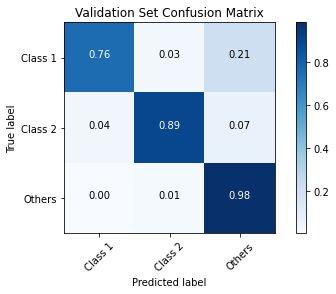

In [7]:
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute confusion matrix
cnf_matrix_va = confusion_matrix(pred_va, tar_va)
np.set_printoptions(precision=3)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_va, classes=['Class 1','Class 2', 'Others'], normalize=True,
                      title='Validation Set Confusion Matrix')

#plt.show()

Normalized confusion matrix
[[0.789 0.074 0.137]
 [0.036 0.916 0.048]
 [0.002 0.014 0.985]]


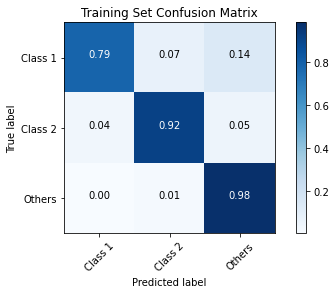

In [8]:
# Compute confusion matrix
cnf_matrix_tr = confusion_matrix(pred_tr, tar_tr)
np.set_printoptions(precision=3)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_tr, classes=['Class 1','Class 2', 'Others'], normalize=True,
                      title='Training Set Confusion Matrix')

In [9]:
grid.best_params_

{'svc__C': 0.9, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}

In [10]:
print(metrics.accuracy_score(tar_tr,pred_tr),metrics.accuracy_score(tar_va,pred_va))

0.975814045695594 0.9726434730895034


# Discussion

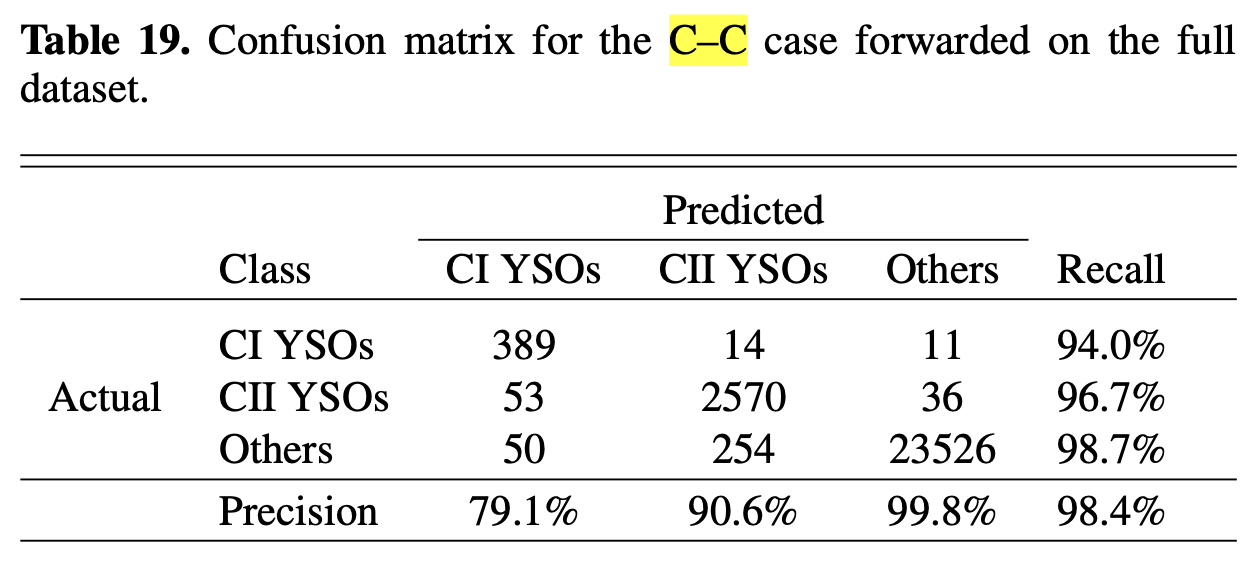

The above figure shows the results of Cornu & Montillaud using a neural-network approach. For the simplicity of our model, the results are within reason.

With using a supervised support vectors classifier methodology we achieve a rate 

Using pure SVC we get a better result than using Logistic Regression as can be seen in notebook 'SF-GridSearch-LogisticRegression'. Our best results (using the standard metric from GridSearch which aims to provide the same results for both training and validation) for SVC are found with a RBF kernel, $\gamma = 1 / (\mathrm{n_{features}})$, and $C=0.9$.

# FUTURE:

Try an ensemble of methods, starting with SVM. See the lines it can create.